In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import minimize 
# not curve_fit !!!

In [2]:
f = lambda x: 3*x**2-1                       
# Define underlying true function

def my_func(x,a,b,c):                        
# Candidate
  return a*x**2+b*x+c
# a, b, c라는 파라미터를 가진 2차 함수
# 실제 f(x)와 유사한 함수로, 최적화할 파라미터(a, b, c)를 찾으려는 함수

def loss(param, x, y):                       
# Define loss function
  return np.sum((y - my_func(x, *param))**2)
# 주어진 x와 y 값에 대해 예측된 값(my_func(x, *param))과 실제 값(y)의 차이를 제곱하여 합산한 값을 반환
# 이 값을 최소화하려는 것이 목표
# 예측값과 실제값 간의 오차를 최소화하려고 함

**Well determined system**

Curve fitting with *minimize* in scipy

In [3]:
x_data = np.array([1, 2, 3])    
# generate samples manually
#x_data = np.random.randn(3,1)               
# 3: # samples, 1: # features
# 독립 변수(x)

In [4]:
y_data = f(x_data)
# x_data에 대해 f(x)를 적용한 값
# 실제 출력 값(y)을 계산한 결과
print(y_data)

[ 2 11 26]


In [5]:
p0 = [0.1, 0.1, 0.1] 
# initial guess for all params
# p0는 최적화 초기값
# a, b, c의 초기값을 0.1, 0.1, 0.1로 설정함

In [6]:
res = minimize(loss, p0, args=(x_data, y_data), method='BFGS')
# minimize() 함수는 최소화 문제를 풀기 위한 함수
# 여기서는 손실 함수(loss)를 최소화하는 파라미터를 찾음
# method='BFGS'는 최적화 알고리즘으로, BFGS(Broyden–Fletcher–Goldfarb–Shanno) 방법을 사용
# 비선형 최적화 문제를 해결하는 방법 중 하나

In [7]:
res
# res는 최적화 결과

      fun: 2.2714938377714228e-13
 hess_inv: array([[  0.74967146,  -2.99865124,   2.49882136],
       [ -2.99865124,  12.24446296, -10.49516133],
       [  2.49882136, -10.49516133,   9.49577163]])
      jac: array([-6.06199535e-11, -7.11608550e-12, -1.82289739e-11])
  message: 'Optimization terminated successfully.'
     nfev: 52
      nit: 10
     njev: 13
   status: 0
  success: True
        x: array([ 2.99999942e+00,  2.29506491e-06, -1.00000189e+00])

In [ ]:
print(res.x)
# 최적화된 파라미터 값 출력
# 3개의 점(x_data값)에 대해 f(x) 함수와 비슷한 형태를 가지는 2차 함수 my_func의 파라미터 a, b, c를 찾는 문제
# minimize 함수는 손실 함수를 최소화하는 파라미터 값을 찾는데, 이때 my_func가 실제 데이터(y_data)와 얼마나 차이가 나는지 계산하고, 그 차이를 최소화하는 파라미터 a, b, c를 찾음

[ 2.99999942e+00  2.29506491e-06 -1.00000189e+00]


**Under determined system**

In [ ]:
x_data = np.array([1,2])
y_data = f(x_data)
p0 = [0.1,0.1,0.1] 
# initial guess for all params
# x_data는 독립 변수 값
# p0는 마찬가지로 초기 파라미터 값, 최적화 알고리즘이 시작할 때 사용됨

In [ ]:
y_data
# y_data는 f(x) 함수에 x_data를 넣어서 계산한 실제 출력값

array([ 2, 11], dtype=int32)

In [ ]:
res = minimize(loss, p0, args=(x_data, y_data), method='BFGS')
# minimize()는 최적화 함수
# 주어진 손실 함수를 최소화하는 파라미터를 찾음
# 첫 번째 인수 loss는 최소화하려는 함수
# 두 번째 인수 p0는 초기 추정값, 최적화는 이 값에서 시작됨
# args=(x_data, y_data)는 loss 함수에 전달될 추가 인수, 여기서는 x_data와 y_data가 전달됨
# method='BFGS'는 최적화에 사용할 알고리즘으로, BFGS(Broyden–Fletcher–Goldfarb–Shanno) 알고리즘은 비선형 최적화에 자주 사용되는 알고리즘임임

In [ ]:
res
# minimize() 함수의 최적화 결과
# 최적화 과정에서 찾은 파라미터 값들, 최적화가 완료된 상태, 최적화에 소요된 시간 등의 정보가 포함됨됨

      fun: 2.472072753990544e-15
 hess_inv: array([[ 0.26042145, -0.35222683, -0.15856858],
       [-0.35222683,  0.77058002, -0.16802213],
       [-0.15856858, -0.16802213,  0.82725155]])
      jac: array([ 6.06115158e-09, -1.79188913e-08,  1.47945709e-08])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 2.92857116,  0.21428646, -1.14285759])

In [ ]:
res.x
# 최적화된 파라미터, a, b, c의 값이 최소 손실 함수를 갖는 값으로 최적화된 결과를 보여줌
# 주어진 x_data, y_data에 대해 2차 함수 my_func의 파라미터 a, b, c를 최적화 하려고 함
# 손실함수는 my_func와 실제 데이터 y_data 사이의 차이를 제곱하여 합산한 값
# minimize() 함수를 사용해 해당 손실 함수를 최소화하는 최적의 파라미터 a, b, c를 찾음
# 즉, f(x) = 3x² - 1에 가장 근접한 함수 my_func(x) = 2x² - 1로 파라미터가 최적화된 결과

array([ 2.92857116,  0.21428646, -1.14285759])

**over determined system**

In [ ]:
x_data = np.array([1, 2, 3, 4])
y_data = f(x_data)
p0 = [0.1,0.1,0.1]
# 마찬가지로 독립변수 x_data값, f(x)에 x_data 적용해 계산된 값인 y_data, 초기 추정값 p0가 주어짐

In [ ]:
res = minimize(loss, p0, args=(x_data, y_data), method='BFGS')
# 마찬가지로 loss 함수는 y_data와 my_func(x, a, b, c) 간의 차이의 제곱합을 계산
# args=(x_data, y_data)는 x_data와 y_data가 loss 함수에 전달된다는 의미
# method='BFGS'는 최적화에 사용할 알고리즘을 지정하는 것, 마찬가지로 비선형 최적화에 사용되는 알고리즘

In [ ]:
res.x
# 최적화된 파라미터 a, b, c 값을 확인

array([ 2.99999958e+00,  2.06361844e-06, -1.00000203e+00])

**Over determined system with error term**

In [ ]:
y_data = y_data + 7*np.random.randn(*np.shape(y_data))
# y_data에 가우시안 노이즈를 추가
# 평균 0, 표준편차 1인 정규분포에서 y_data의 크기만큼 랜덤한 값들을 생성하는 함수
# 그 값을 7배 키워서 노이즈를 추가하는 역할
# 노이즈는 데이터를 더 불확실하게 만들어, 최적화가 정확하지 않게 만드는 효과가 있음

In [ ]:
res = minimize(loss, p0, args=(x_data, y_data), method='BFGS')
# 마찬가지로 최적화를 수행해 최적의 파라미터 값을 찾음

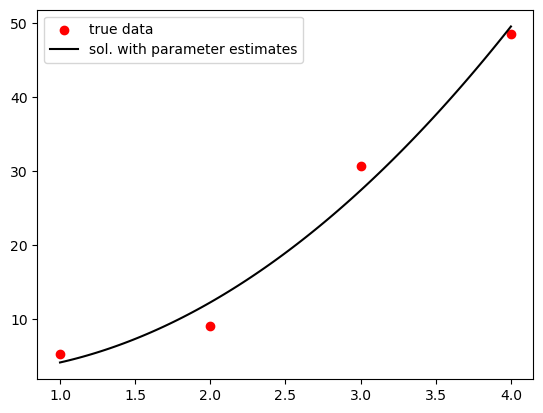

In [ ]:
x = np.linspace(np.min(x_data), np.max(x_data), 100)
y = my_func(x, *res.x)
# x_data의 최소값과 최대값 사이를 100개의 점으로 균등하게 나눈 값들을 x로 생성
# 최적화된 파라미터 res.x를 사용하여 my_func(x)를 계산, 이 값들은 최적화된 함수로 예측된 값들

figure = plt.figure()
axes = figure.add_subplot(111)
axes.scatter(x_data, y_data, label='true data', color = "red")
axes.plot(x, y, label='sol. with parameter estimates', color = "black")
axes.legend()
plt.show()
# matplotlib를 사용하여 실제 데이터와 최적화 결과를 그래프로 시각화
# 빨간색 점은 원본 데이터 (실제값)
# 검은색 선은 최적화된 함수의 예측